## Project Name – Santander Customer Transaction Prediction

## Problem Statement:
The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings. Our goal is to develop and optimize Machine Learning models that effectively predict the bike rental count for the day



In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [209]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')



In [210]:
train_df.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [80]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


### There are 200,000 observations in the training and testing dataset. In addition to this there is also the target column in training data which has two boolean values, 0 or 1. and 200 independant variables in both training and testing dataset

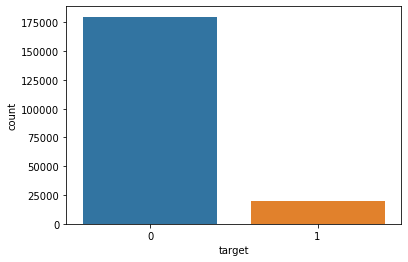

In [81]:
#checking target column
sns.countplot(train_df['target'])

### From the above bar graph we can see that we have imbalanced training dataset

### Histogram: Displays the distribution of all numerical features per each class

Distributions of first 28 columns


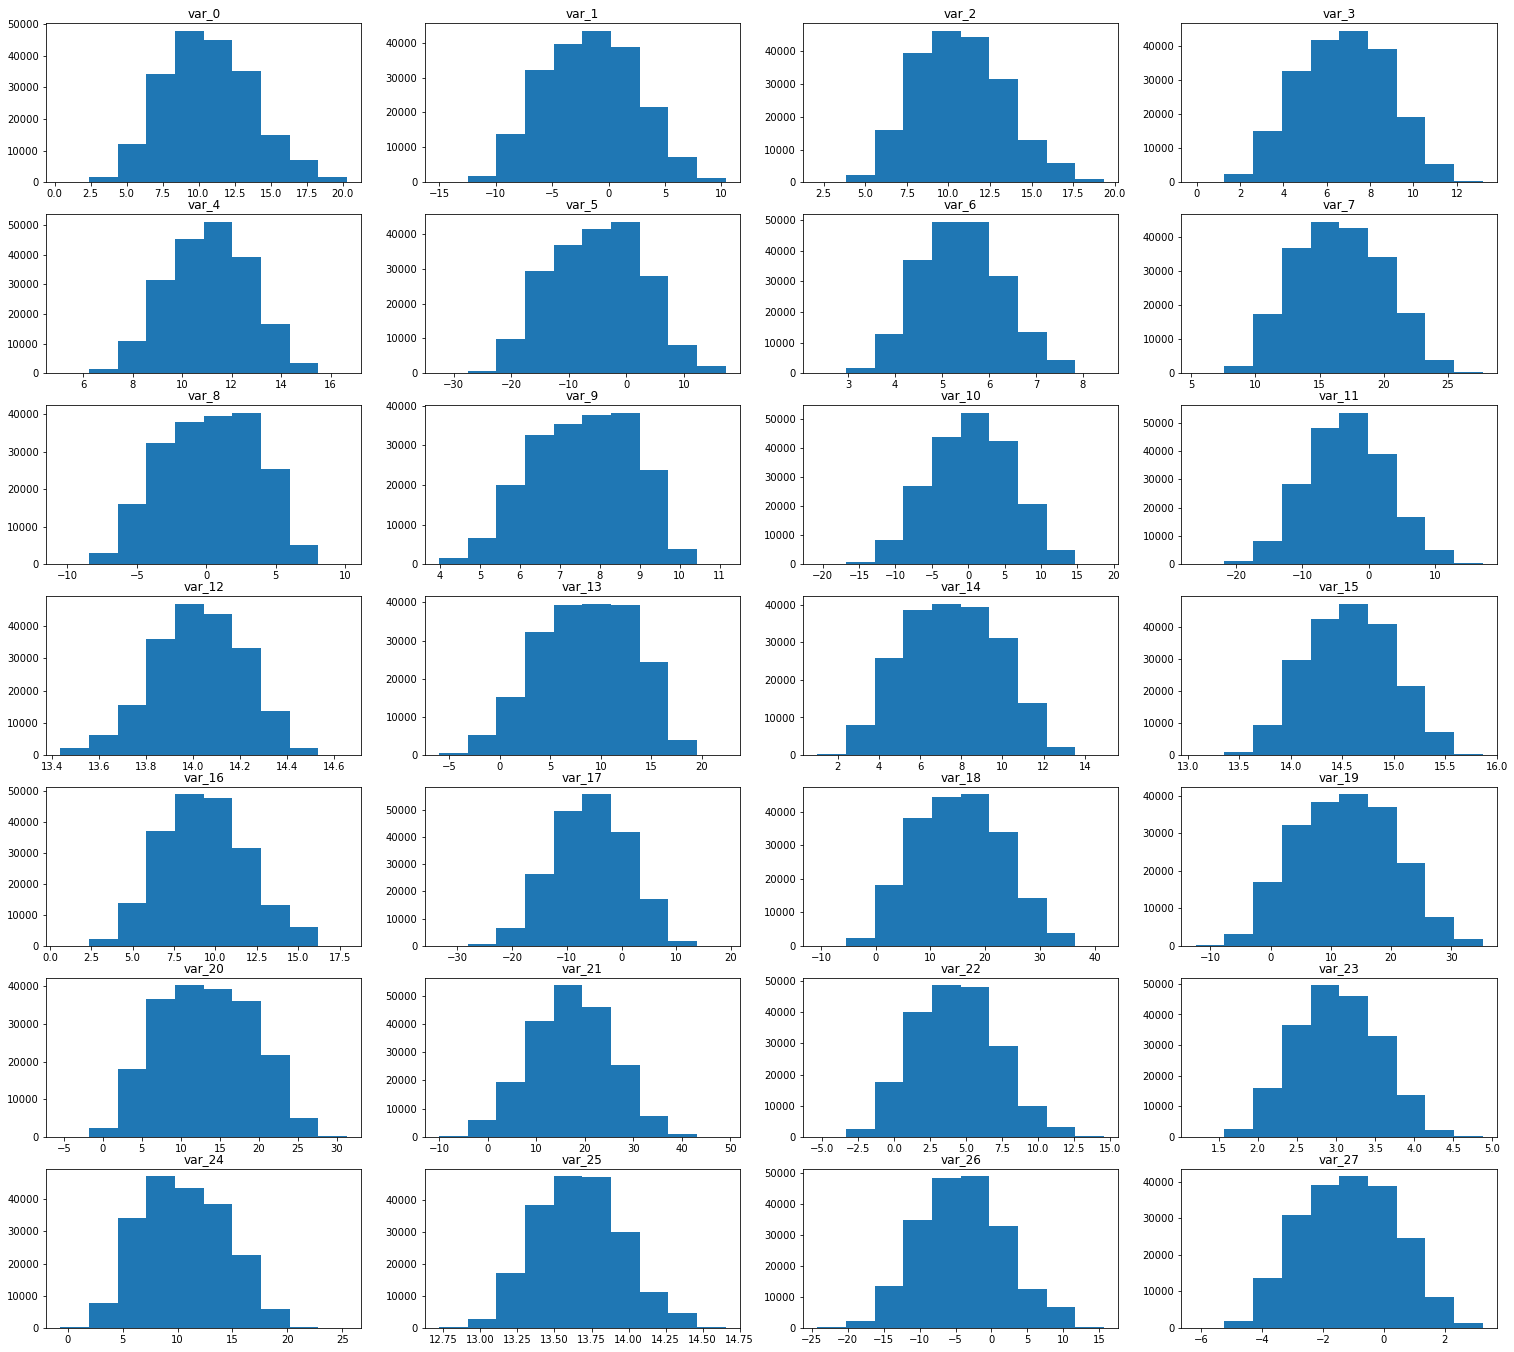

In [40]:
print('Distributions of first 28 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_df.columns)[2:30]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train_df[col])
    plt.title(col)
    


Distributions of first 28-56 columns


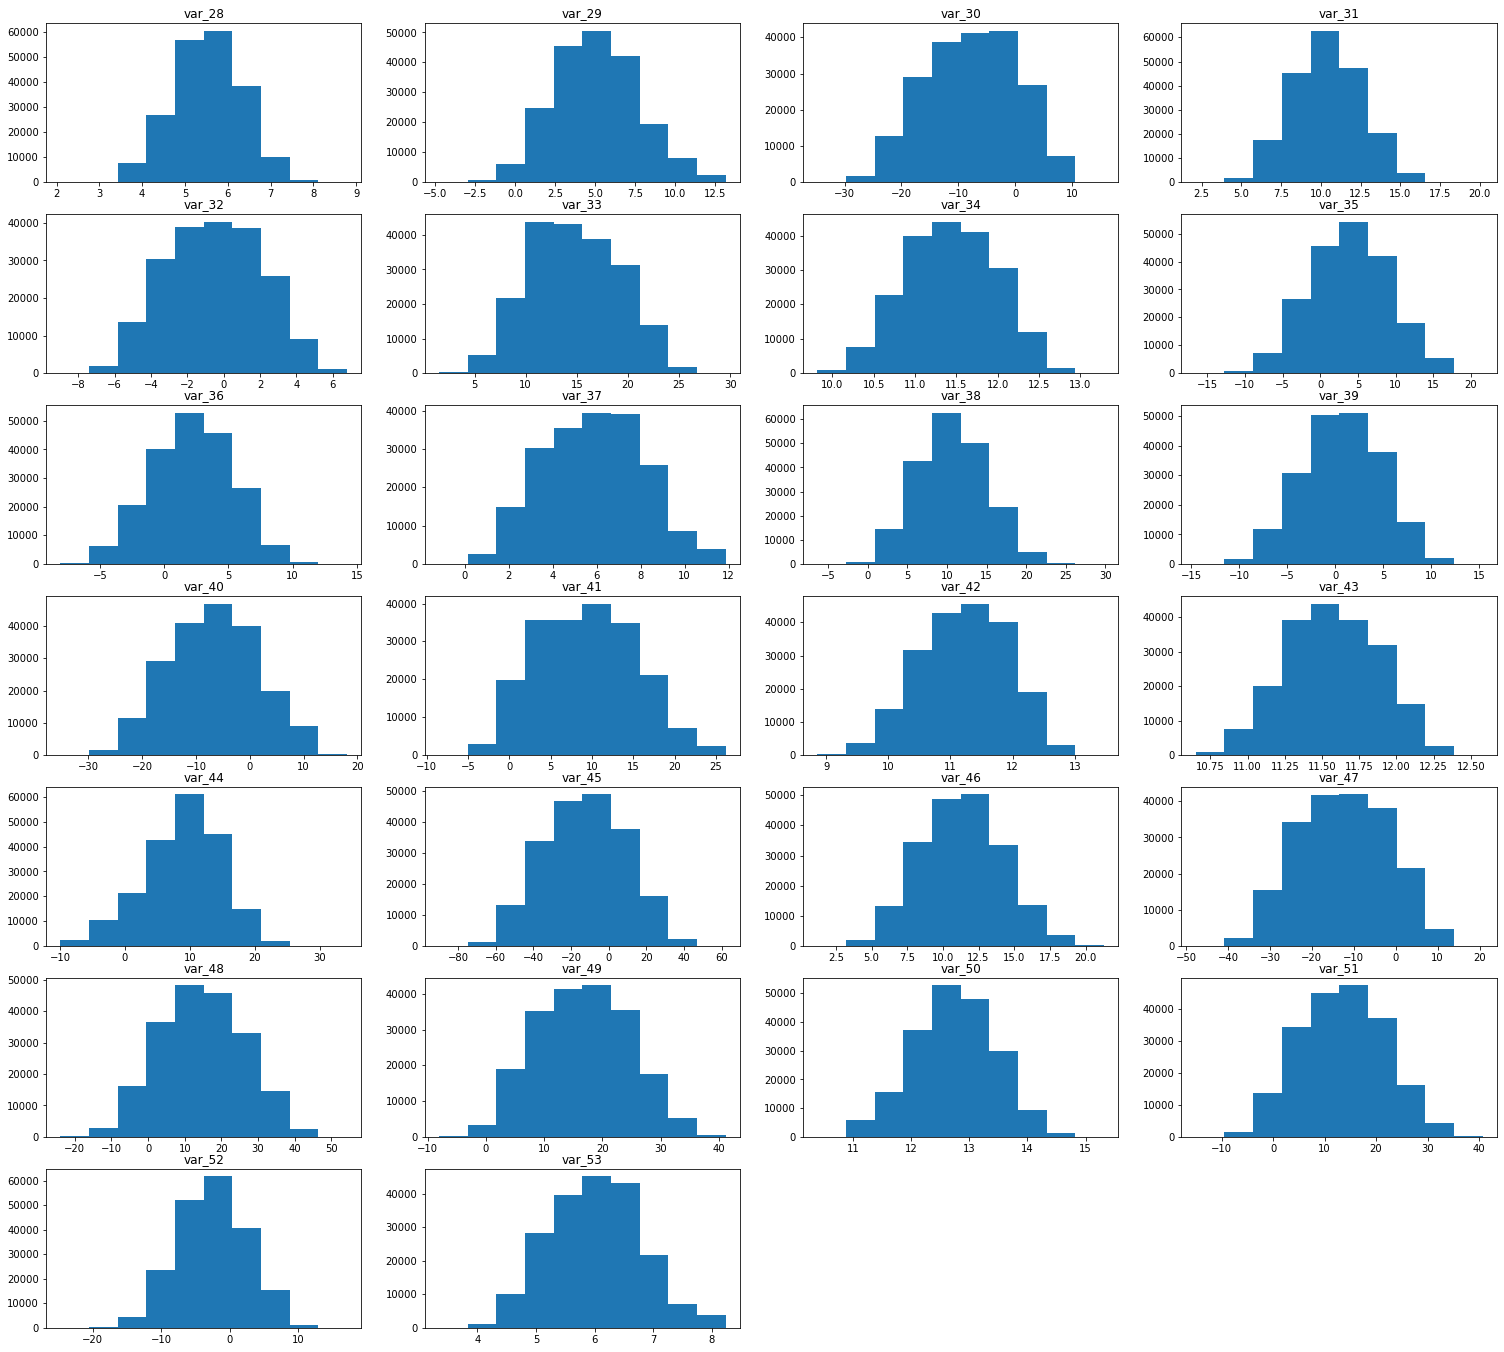

In [41]:
print('Distributions of first 28-56 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_df.columns)[30:56]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train_df[col])
    plt.title(col)
    


Distributions of first 56-86 columns


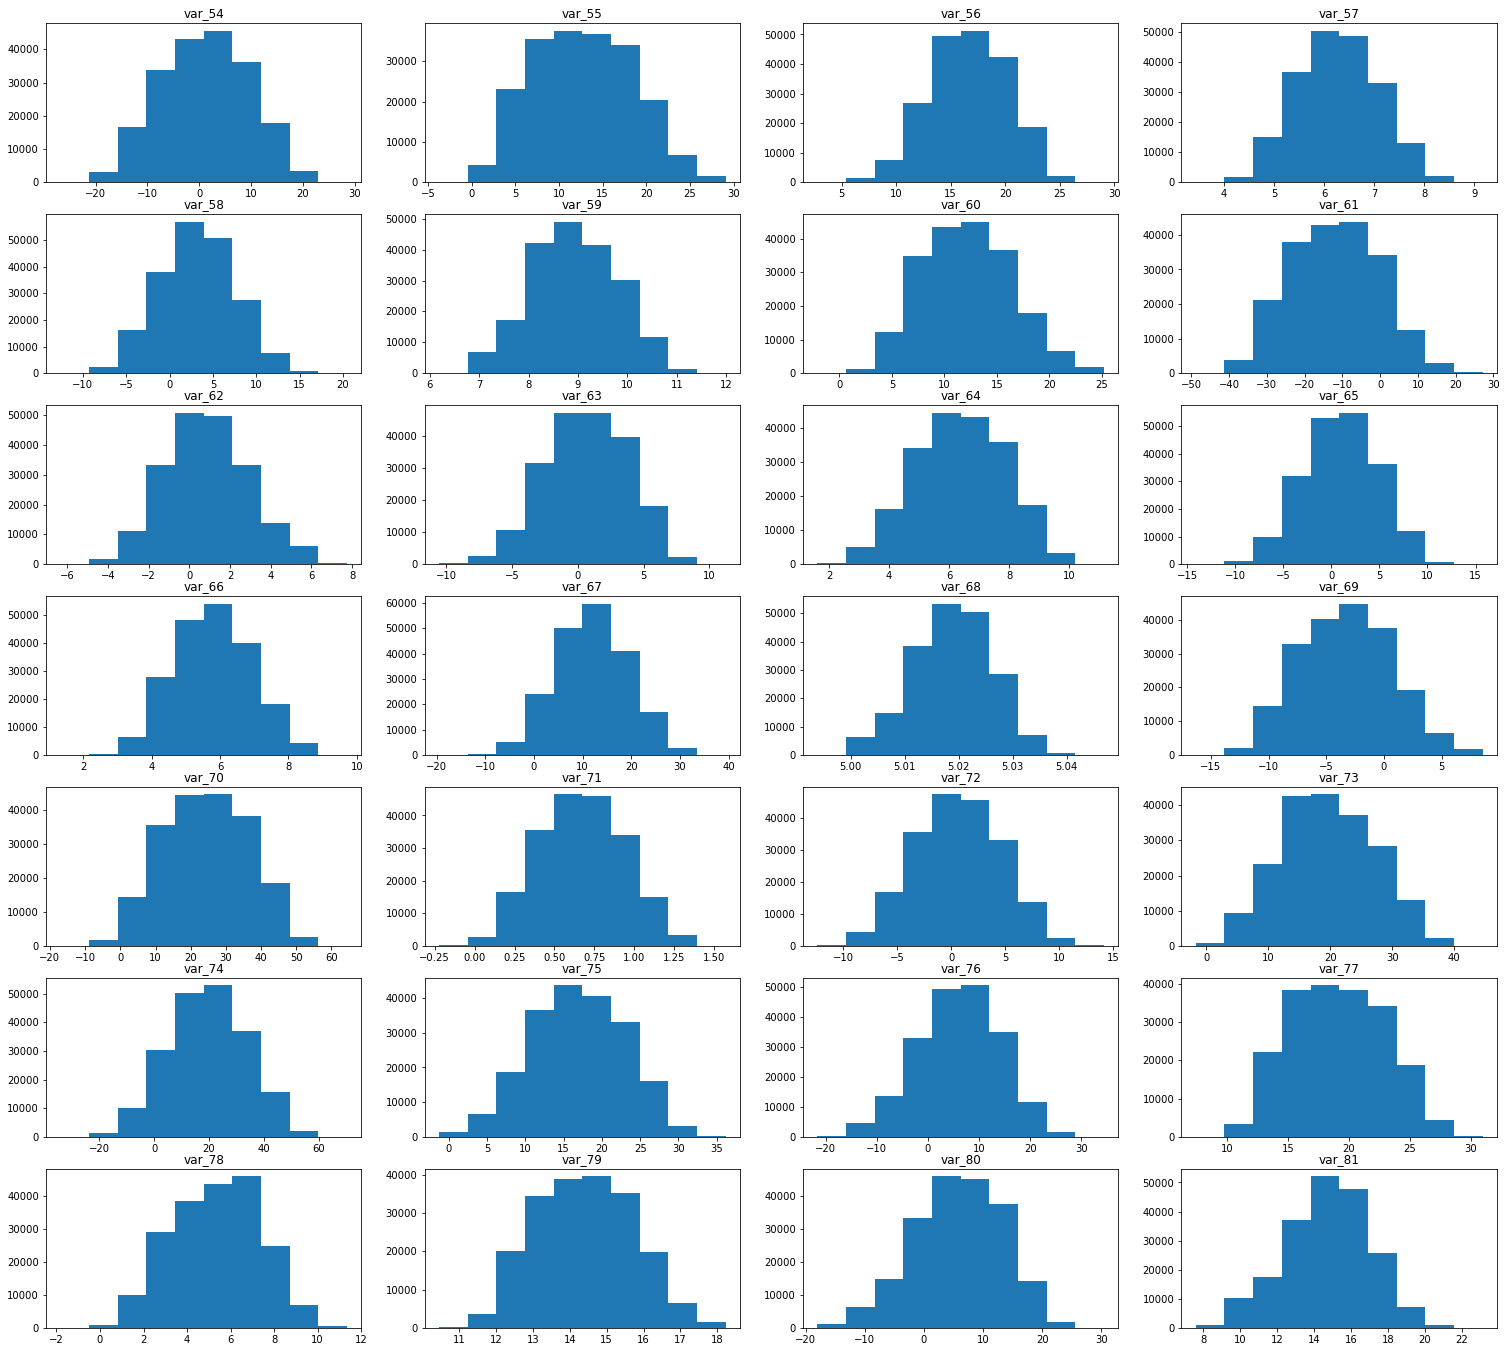

In [43]:
print('Distributions of first 56-86 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_df.columns)[56:84]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train_df[col])
    plt.title(col)
    


Distributions of first 84-112 columns


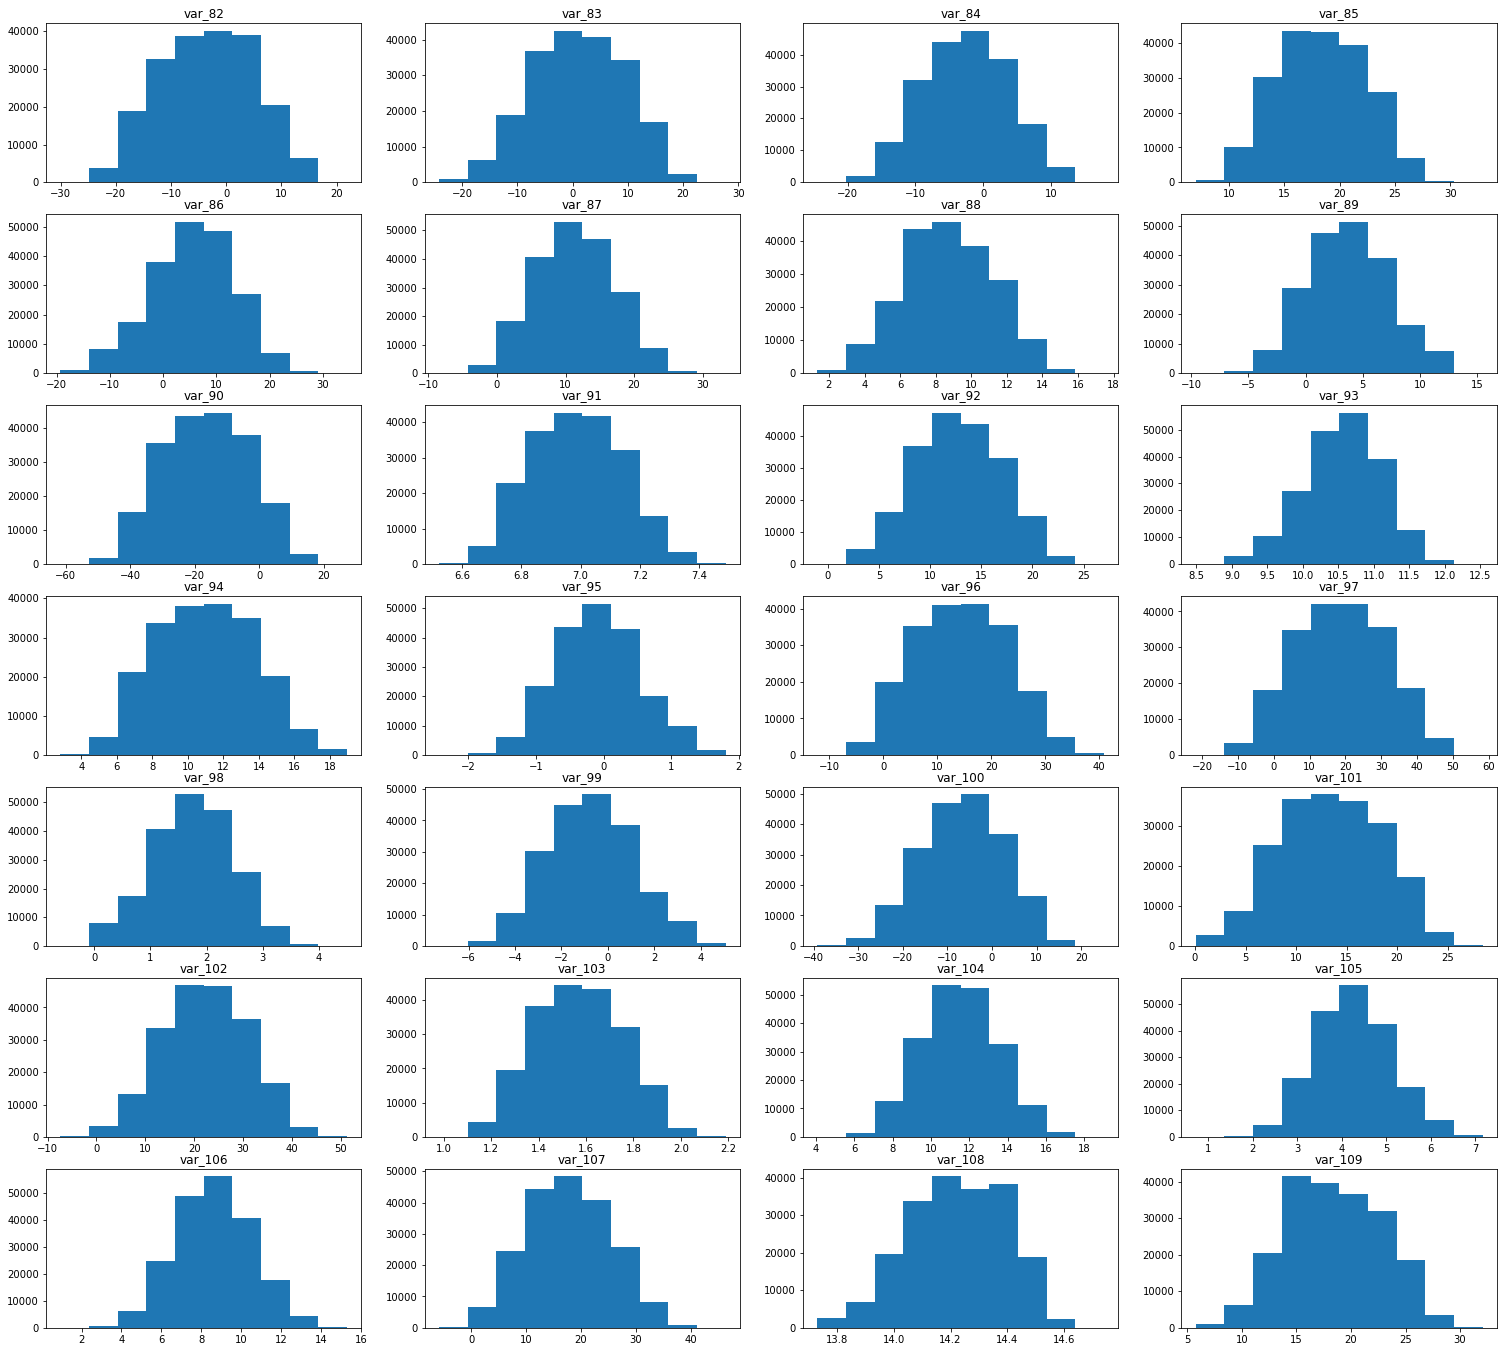

In [44]:
print('Distributions of first 84-112 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_df.columns)[84:112]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train_df[col])
    plt.title(col)
    


Distributions of first 112-140 columns


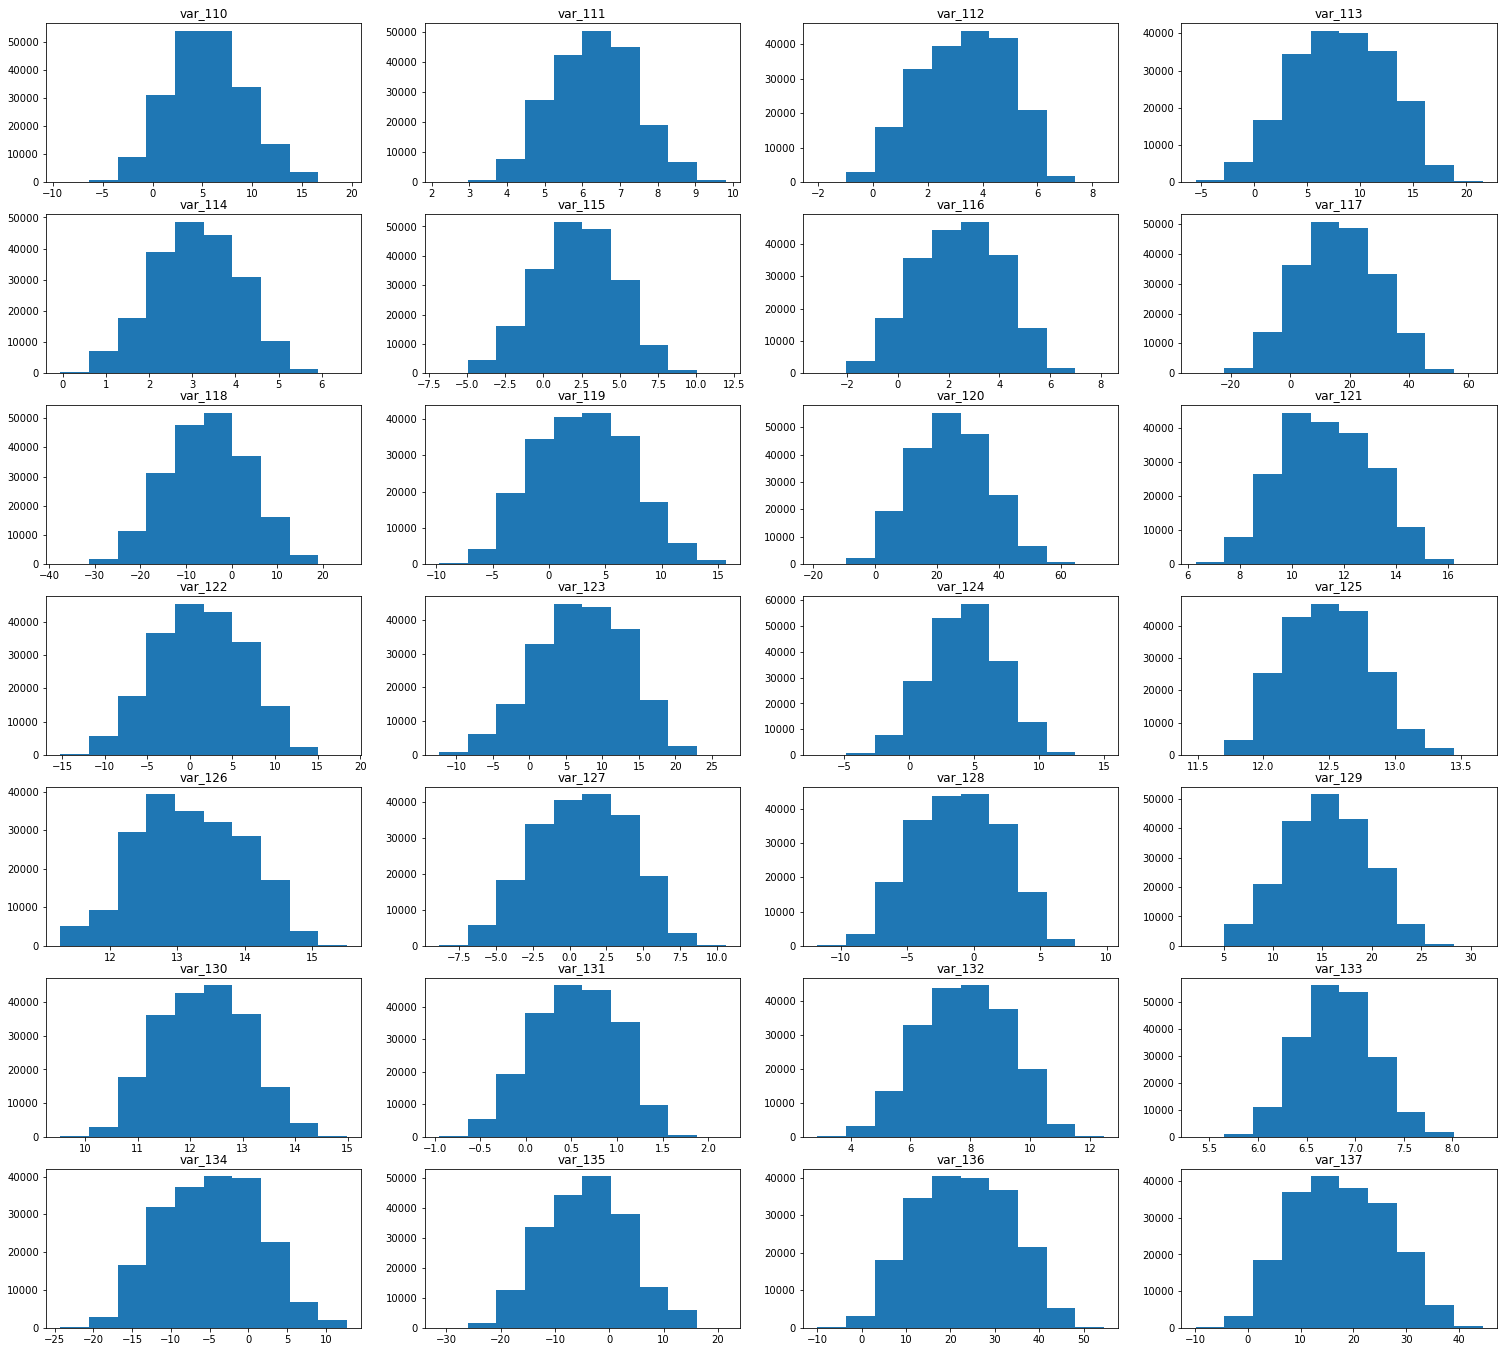

In [45]:
print('Distributions of first 112-140 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_df.columns)[112:140]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train_df[col])
    plt.title(col)
    


Distributions of first 140-168 columns


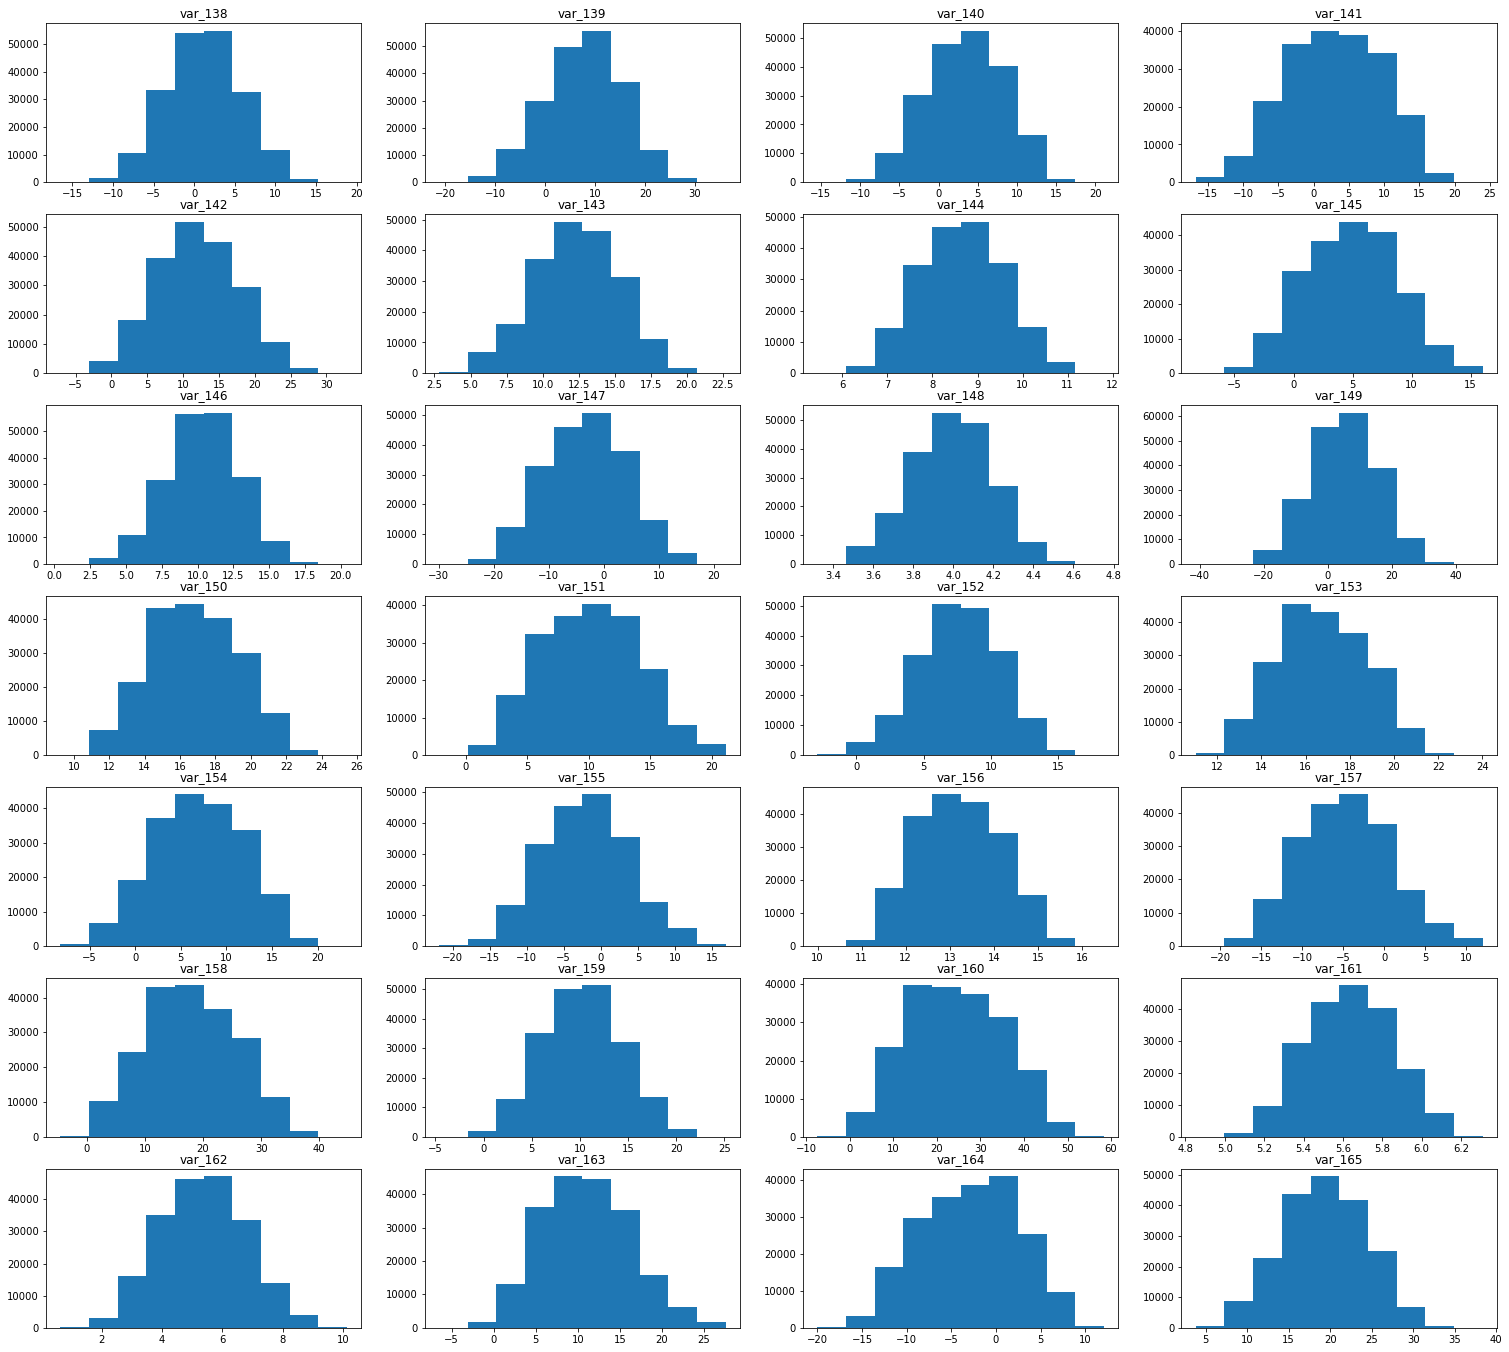

In [46]:
print('Distributions of first 140-168 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_df.columns)[140:168]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train_df[col])
    plt.title(col)
    


Distributions of first 168-196 columns


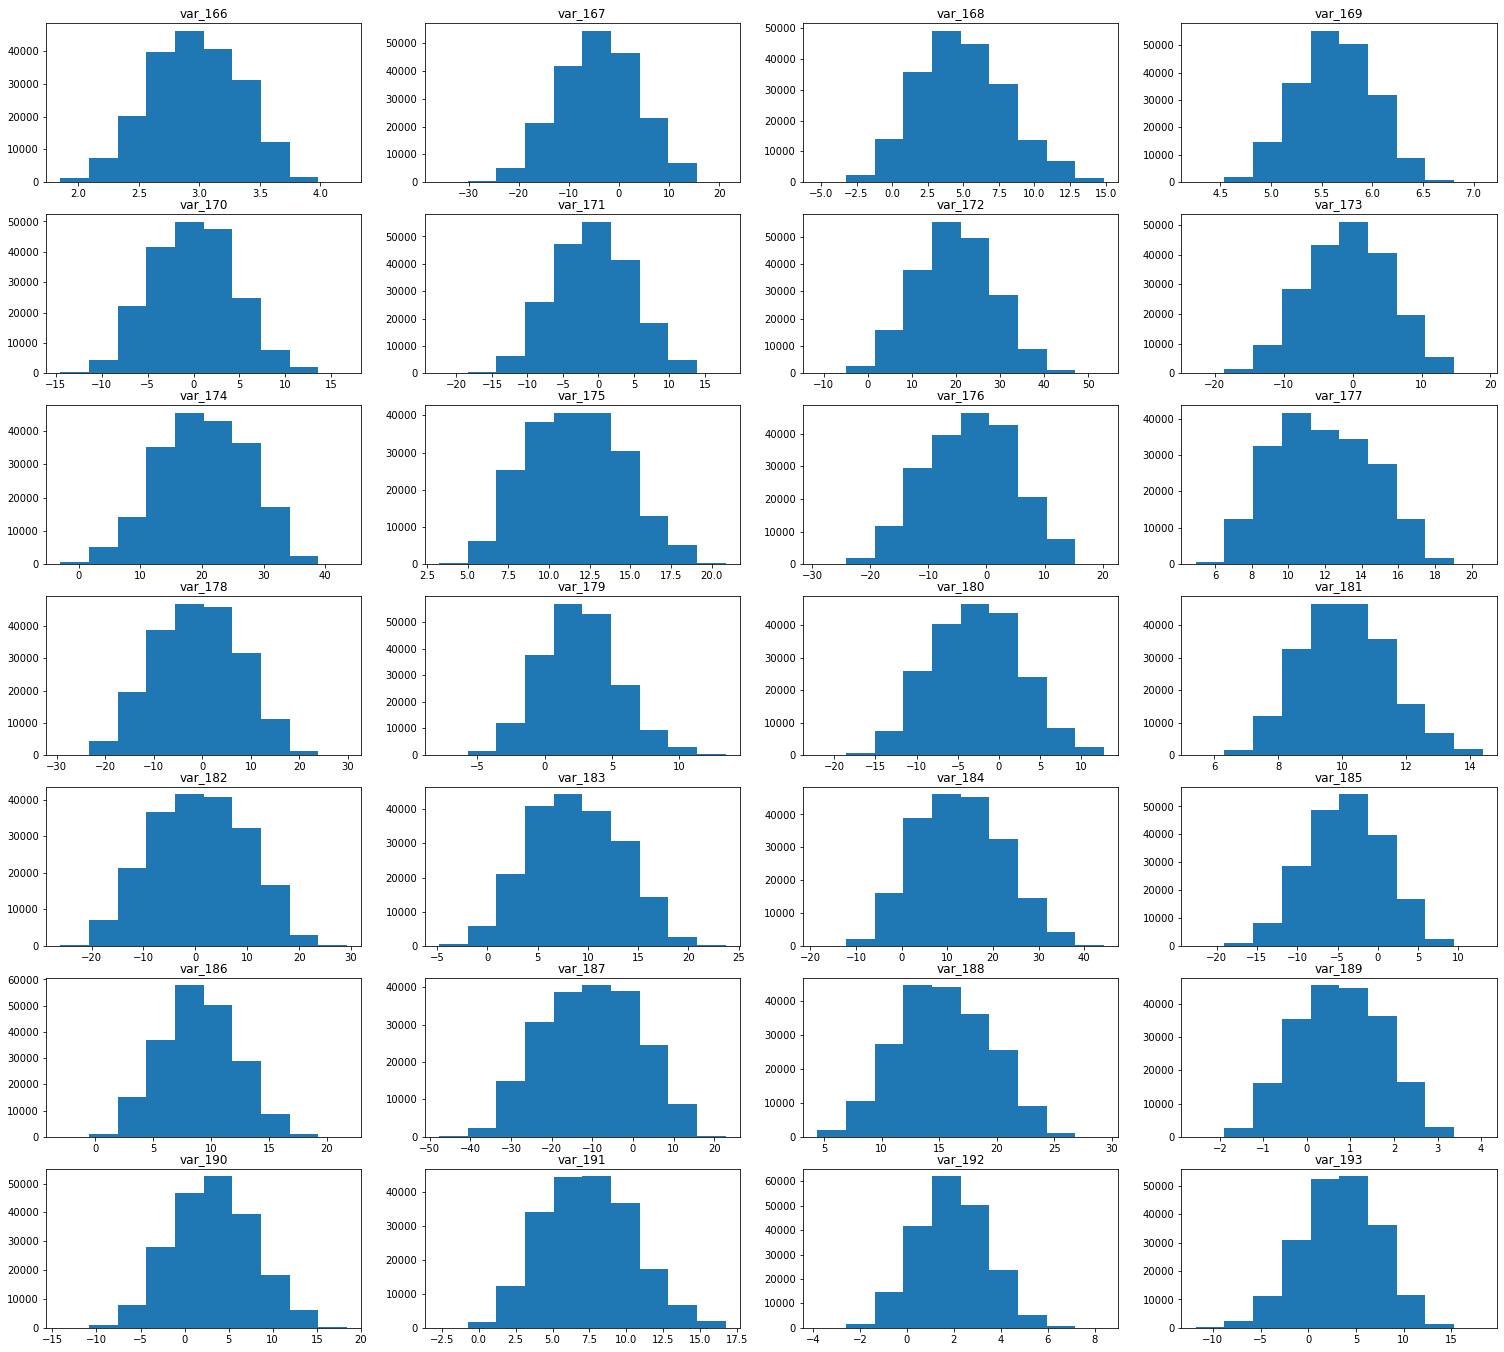

In [47]:
print('Distributions of first 168-196 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_df.columns)[168:196]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train_df[col])
    plt.title(col)
    


Distributions of first 196:202 columns


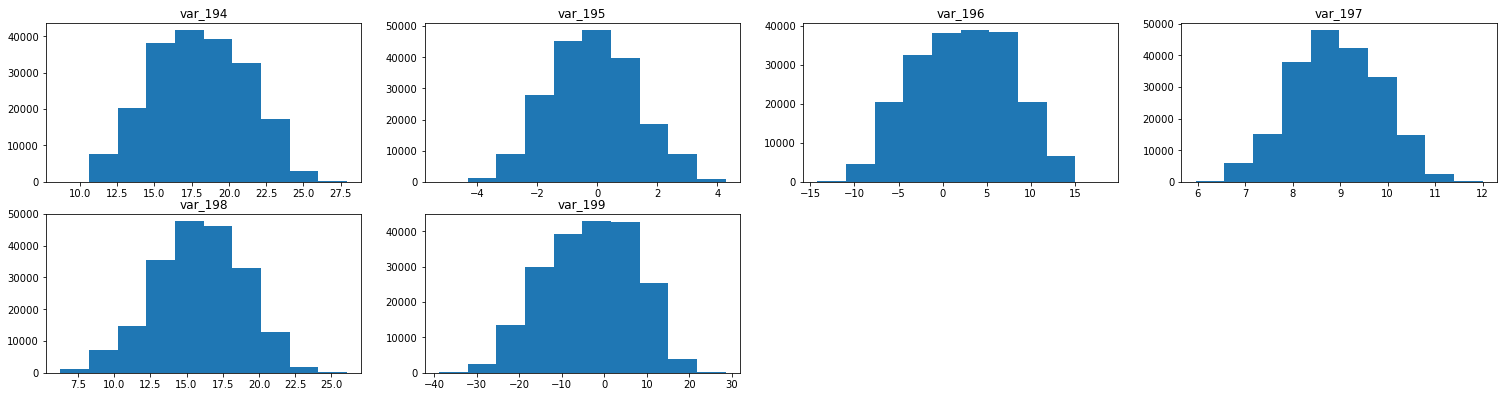

In [48]:
print('Distributions of first 196:202 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_df.columns)[196:202]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train_df[col])
    plt.title(col)
    


### from above graphs we can see that almost all features follows normalised distribution

In [82]:
#######################################Missing Values Analysis#################################


#Create dataframe with missing percentage
missing_val = pd.DataFrame(train_df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train_df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
#################################missing value analysis in test data##########################################
#Create dataframe with missing percentage
missing_val_test = pd.DataFrame(test_df.isnull().sum())

#Reset index
missing_val_test = missing_val_test.reset_index()

#Rename variable
missing_val_test = missing_val_test.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val_test['Missing_percentage'] = (missing_val_test['Missing_percentage']/len(test_df))*100

#descending order
missing_val_test = missing_val_test.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)


In [83]:
print(missing_val)
print(missing_val_test)

    Variables  Missing_percentage
0     ID_code                 0.0
1     var_136                 0.0
2     var_126                 0.0
3     var_127                 0.0
4     var_128                 0.0
..        ...                 ...
197    var_68                 0.0
198    var_69                 0.0
199    var_70                 0.0
200    var_71                 0.0
201   var_199                 0.0

[202 rows x 2 columns]
    Variables  Missing_percentage
0     ID_code                 0.0
1     var_137                 0.0
2     var_127                 0.0
3     var_128                 0.0
4     var_129                 0.0
..        ...                 ...
196    var_69                 0.0
197    var_70                 0.0
198    var_71                 0.0
199    var_72                 0.0
200   var_199                 0.0

[201 rows x 2 columns]


### from above analysis we can see there is no missing value present in training and testing dataset

In [84]:
#############################################Feature Selection###################################################

##Correlation analysis
corr = train_df.corr()

In [93]:
corr

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


### We can observed that the correlation between the attributes is very small. 
### There are 200 features that are mostly un-correlated between them.

### Feature Scaling

In [211]:
training_dataset=train_df.drop(['ID_code'], axis=1)


In [212]:
#Nomalisation
for i in range(200):
    var='var_{}'.format(i)
    training_dataset[var] = (training_dataset[var] - (training_dataset[var].min()))/((training_dataset[var].max()) - (training_dataset[var].min()))
    test_df[var] = (test_df[var] - (test_df[var].min()))/((test_df[var].max()) - (test_df[var].min()))
    

In [213]:
training_dataset.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041


### Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

### Model Development

In [214]:
from sklearn.metrics import accuracy_score
# as our target variable is binary we need to replace 0,1 to N,Y for classification model development
#replace target categories with Yes or No
training_dataset['target'] = training_dataset['target'].replace(0, 'No')
training_dataset['target'] = training_dataset['target'].replace(1, 'Yes')

In [215]:
#Divide data into train and test
Y= training_dataset['target']
X = training_dataset.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, shuffle=True)


### Random Forest model

In [216]:
###########################################Random Forest model ##################################################
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [217]:
RF_Predictions = RF_model.predict(X_test)

In [218]:
#build confusion matrix
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
accuracy_score = ((TP+TN)*100)/(TP+TN+FP+FN)
print('accuracy score : {} %'.format(accuracy_score))

accuracy score : 90.2025 %


### From above Confusion Matrix we can see the Random forest model accuracy is 90.2025 %

In [219]:
training_dataset['target'] = training_dataset['target'].replace('No', 0)
training_dataset['target'] = training_dataset['target'].replace('Yes', 1)

In [220]:
#Divide data into train and test
Y= training_dataset['target']
X = training_dataset.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, shuffle=True)


### Logistic Regression

In [221]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.232139
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               160000
Model:                          Logit   Df Residuals:                   159800
Method:                           MLE   Df Model:                          199
Date:                Tue, 29 Oct 2019   Pseudo R-squ.:                  0.2907
Time:                        10:06:40   Log-Likelihood:                -37142.
converged:                       True   LL-Null:                       -52366.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          1.0264      0.062     16.561      0.000       0.905       1.148
var_1          0.9678      0.060     16.054      0.000       0.850       1.086
var_2          1.0630      0.062     17.212      0.000       0.942       1.184
var_3          0.1536      0.062      2.460      0.014       0.031       0.276
var_4          0.2143      0.069      3.122      0.002       0.080       0.349
var_5          0.6573      0.061     10.772      0.000       0.538       0.777
var_6          1.5250      0.067     22.753      0.000       1.394       1.656
var_7         -0.1047      0.063     -1.661      0.097      -0.228       0.019
var_8          0.3437      0.060      5.740      0.000       0.226       0.461
var_9         -0.8493      0.056    -15.270      0.000      -0.958      -0.740
var_10        -0.1116      0.069     -1.619      0.105      -0.247       0.023
var_11         0.4411      0.069      6.353      0.000       0.305       0.577
var_12        -1.4372      0.061    -23.633      0.000      -1.556      -1.318
var_13        -1.1774      0.058    -20.207      0.000      -1.292      -1.063
var_14        -0.1319      0.060     -2.210      0.027      -0.249      -0.015
var_15         0.2887      0.065      4.442      0.000       0.161       0.416
var_16         0.0755      0.065      1.163      0.245      -0.052       0.203
var_17        -0.0633      0.075     -0.843      0.399      -0.211       0.084
var_18         0.8666      0.064     13.583      0.000       0.742       0.992
var_19         0.1327      0.057      2.322      0.020       0.021       0.245
var_20        -0.4483      0.060     -7.451      0.000      -0.566      -0.330
var_21        -1.4600      0.070    -20.999      0.000      -1.596      -1.324
var_22         1.3920      0.066     20.958      0.000       1.262       1.522
var_23        -0.6219      0.067     -9.270      0.000      -0.753      -0.490
var_24         0.7033      0.066     10.595      0.000       0.573       0.833
var_25         0.2228      0.065      3.429      0.001       0.095       0.350
var_26         1.3129      0.064     20.598      0.000       1.188       1.438
var_27        -0.0998      0.060     -1.676      0.094      -0.217       0.017
var_28        -0.7775      0.082     -9.456      0.000      -0.939      -0.616
var_29         0.1155      0.066      1.751      0.080      -0.014       0.245
var_30        -0.0737      0.061     -1.204      0.229      -0.194       0.046
var_31        -0.8250      0.081    -10.223      0.000      -0.983      -0.667
var_32         0.6060      0.059     10.347      0.000       0.491       0.721
var_33        -1.0838      0.063    -17.234      0.000      -1.207      -0.961
var_34        -1.2112      0.062    -19.643      0.000      -1.332      -1.090
var_35         0.8734      0.070     12.396      0.000       0.735       1.011
var_36        -1.0153      0.069    -14.747      0.000      -1.150      -0.880
var_37         0.0857      0.056      1.537      0.124      -0.024       0.195
va

In [222]:
#Predict test data
Logit_Predictions= logit.predict(X_test)


In [223]:
for i,j in enumerate(Logit_Predictions): 
    if j > 0.5:
        Logit_Predictions[i]=1
    else:
        Logit_Predictions[i]=0

In [224]:
#build confusion matrix
CM = pd.crosstab(y_test, Logit_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
accuracy_score = ((TP+TN)*100)/(TP+TN+FP+FN)
print('accuracy score : {} %'.format(accuracy_score))

accuracy score : 90.49902786779002 %


### From above Confusion Matrix we can see the Logistic regression model accuracy is 90.49902786779002 %

In [225]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [226]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [227]:
#build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
accuracy_score = ((TP+TN)*100)/(TP+TN+FP+FN)
print('accuracy score : {} %'.format(accuracy_score))

accuracy score : 92.355 %


### From above Confusion Matrix we can see the Naive Bayes model accuracy is 92.35 %

In [228]:
##########################predict the value of target column in the test set############################

# #predict on test cases #raw
# predictions = NB_model.predict(test_df)
test_data_predictors=test_df.drop(['ID_code'], axis=1)

In [230]:

predictions = NB_model.predict(test_data_predictors)

In [231]:
test_df['target']=predictions

In [232]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,test_0,0.491396,0.934286,0.647868,0.717967,0.563676,0.563885,0.596918,0.555992,0.616146,...,0.745496,0.168422,0.477313,0.233148,0.780223,0.613081,0.745210,0.445426,0.456290,0
1,test_1,0.376861,0.667159,0.547072,0.395628,0.351853,0.527653,0.624899,0.572118,0.282491,...,0.587858,0.377335,0.741635,0.333622,0.569846,0.417179,0.606236,0.628698,0.274352,0
2,test_2,0.239172,0.191796,0.475918,0.537077,0.452813,0.834554,0.440118,0.643958,0.585037,...,0.700735,0.468998,0.467990,0.193832,0.744399,0.228884,0.146114,0.667101,0.241644,0
3,test_3,0.377177,0.561688,0.590920,0.501147,0.318535,0.687271,0.447462,0.657790,0.679433,...,0.600497,0.440591,0.516235,0.312664,0.854102,0.599396,0.501114,0.322375,0.523223,0
4,test_4,0.520319,0.610381,0.719749,0.590456,0.342955,0.426075,0.762902,0.216621,0.659735,...,0.605501,0.407583,0.509229,0.547880,0.489135,0.294091,0.183191,0.367939,0.449389,0


In [234]:
# save given test dataset into csv file 
test_df.to_csv('./test_with_pred.csv')